In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

iem_dallas_df = pd.read_csv("demos.csv")

### Average Win Rate as T on Each Map

<Axes: title={'center': 'T Win Rate per Map'}, xlabel='Map Name', ylabel='T Win Rate (%)'>

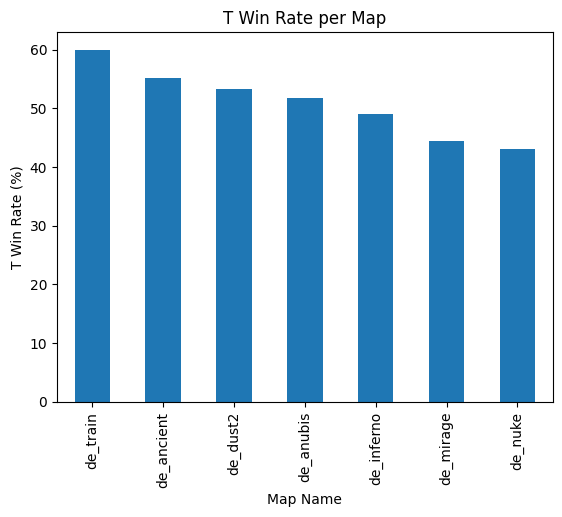

In [3]:
total_rounds_per_map_name_df = iem_dallas_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_name_df.columns = ['map_name', 'total_rounds']

t_wins_per_map_df = iem_dallas_df.loc[(iem_dallas_df['round_result'] == "T") & (iem_dallas_df['team_name'] != iem_dallas_df['round_ct_team'])]
t_wins_per_map_df = t_wins_per_map_df.groupby( 'map_name')['round_id'].nunique().to_frame().reset_index()
t_wins_per_map_df.columns = ['map_name', 't_wins']

average_t_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, t_wins_per_map_df, on=['map_name'])
average_t_wins_per_map_df['t_win_rate'] = average_t_wins_per_map_df['t_wins'] / average_t_wins_per_map_df['total_rounds'] * 100

average_t_wins_per_map_df = average_t_wins_per_map_df.sort_values(by='t_win_rate', ascending=False)
average_t_wins_per_map_df.index = average_t_wins_per_map_df['map_name']
average_t_wins_per_map_df['t_win_rate'].plot.bar(x='map_name', title='T Win Rate per Map', xlabel='Map Name', ylabel='T Win Rate (%)')

### Average Win Rate as CT on Each Map

<Axes: title={'center': 'CT Win Rate per Map'}, xlabel='Map Name', ylabel='CT Win Rate (%)'>

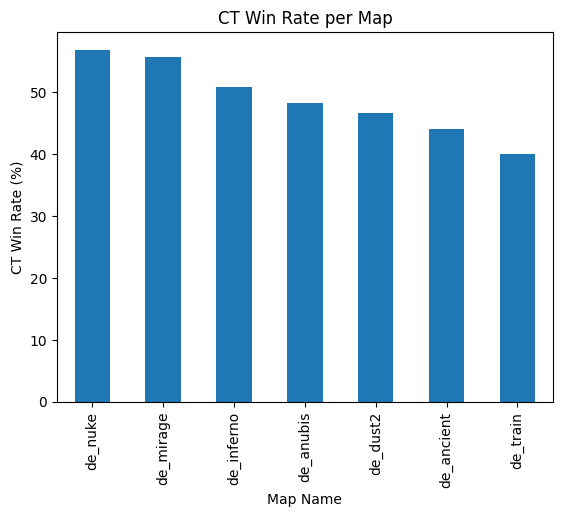

In [4]:

ct_wins_per_map_df = iem_dallas_df.loc[(iem_dallas_df['round_result'] == "CT") & (iem_dallas_df['team_name'] == iem_dallas_df['round_ct_team'])]
ct_wins_per_map_df = ct_wins_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
ct_wins_per_map_df.columns = ['map_name', 'ct_wins']

average_ct_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, ct_wins_per_map_df, on=['map_name'])
average_ct_wins_per_map_df['ct_win_rate'] = average_ct_wins_per_map_df['ct_wins'] / average_ct_wins_per_map_df['total_rounds'] * 100

average_ct_wins_per_map_df.sort_values(by="ct_win_rate", ascending=False, inplace=True)
average_ct_wins_per_map_df.index = average_ct_wins_per_map_df['map_name']
average_ct_wins_per_map_df['ct_win_rate'].plot.bar(x='map_name', title='CT Win Rate per Map', xlabel='Map Name', ylabel='CT Win Rate (%)')

### Bomb Plant rate per each Map

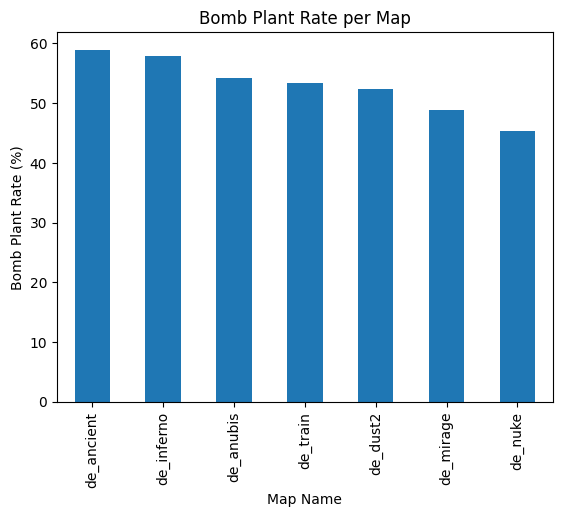

In [5]:
bomb_plants_per_map_df = iem_dallas_df.loc[(iem_dallas_df['round_bomb_plant_site'] == "A") | (iem_dallas_df['round_bomb_plant_site'] == "B")]

bomb_plants_per_map_df = bomb_plants_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
bomb_plants_per_map_df.columns = ['map_name', 'bomb_plants']

average_bomb_plants_per_map_df = pd.merge(total_rounds_per_map_name_df, bomb_plants_per_map_df, on=['map_name'])
average_bomb_plants_per_map_df['bomb_plant_rate'] = average_bomb_plants_per_map_df['bomb_plants'] / average_bomb_plants_per_map_df['total_rounds'] * 100

average_bomb_plants_per_map_df.sort_values(by='bomb_plant_rate', ascending=False, inplace=True)
average_bomb_plants_per_map_df.index = average_bomb_plants_per_map_df['map_name']
average_bomb_plants_per_map_df['bomb_plant_rate'].plot.bar(x='map_name', title='Bomb Plant Rate per Map', xlabel='Map Name', ylabel='Bomb Plant Rate (%)')
plt.pyplot.show()

### Successful Defuse Rate per Map

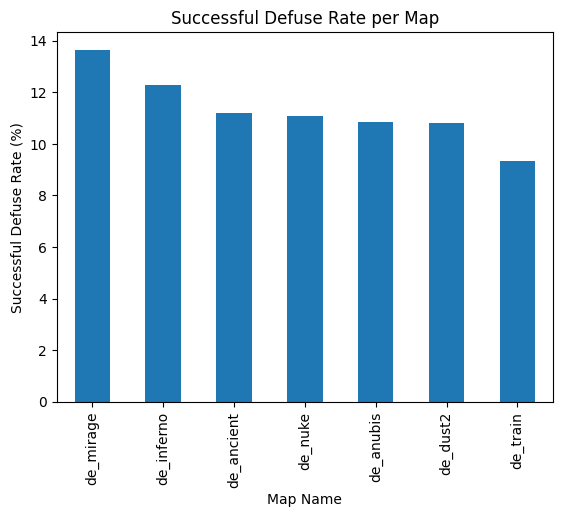

In [6]:
successful_defuses_per_map_df = iem_dallas_df.loc[(iem_dallas_df['bomb_defuse_time'] > 0)]
successful_defuses_per_map_df = successful_defuses_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
successful_defuses_per_map_df.columns = ['map_name', 'successful_defuses']

average_successful_defuses_per_map_df = pd.merge(total_rounds_per_map_name_df, successful_defuses_per_map_df, on=['map_name'])
average_successful_defuses_per_map_df['successful_defuse_rate'] = average_successful_defuses_per_map_df['successful_defuses'] / average_successful_defuses_per_map_df['total_rounds'] * 100

average_successful_defuses_per_map_df.sort_values(by='successful_defuse_rate', ascending=False, inplace=True)
average_successful_defuses_per_map_df.index = average_successful_defuses_per_map_df['map_name']
average_successful_defuses_per_map_df['successful_defuse_rate'].plot.bar(x='map_name', title='Successful Defuse Rate per Map', xlabel='Map Name', ylabel='Successful Defuse Rate (%)')
plt.pyplot.show()


### Time Distribution of Terrorist Getting inside the Site

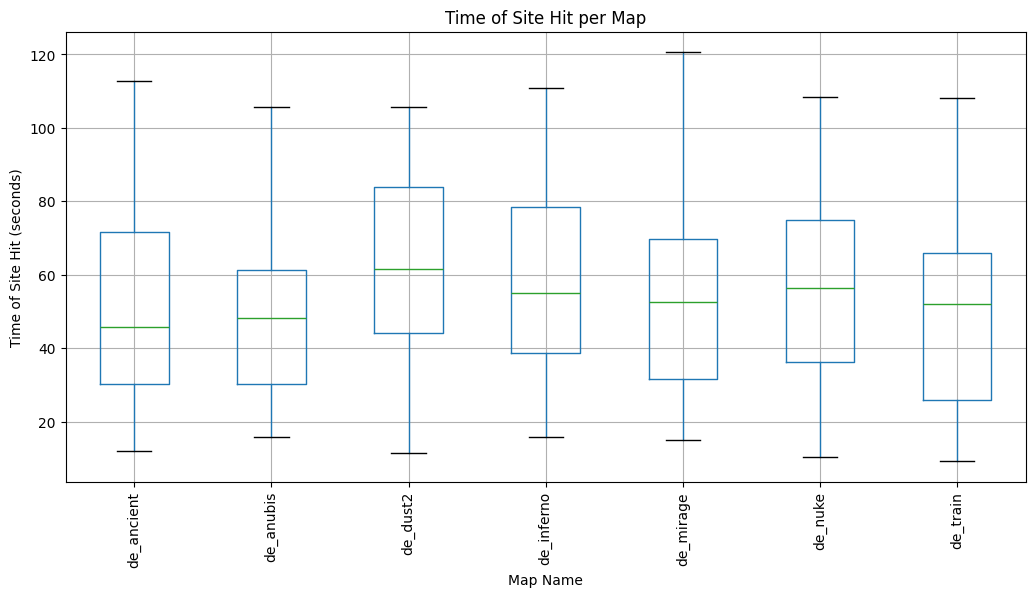

In [39]:
time_of_site_hit = iem_dallas_df.loc[(iem_dallas_df['round_site_hit_time'] > 0)]
time_of_site_hit = time_of_site_hit.groupby(['map_name', 'round_site_hit_time'])['round_id'].nunique().to_frame().reset_index()
time_of_site_hit.drop(columns=['round_id'], inplace=True)

time_of_site_hit.boxplot('round_site_hit_time', by='map_name', figsize=(12, 6))
plt.pyplot.title('Time of Site Hit per Map')
plt.pyplot.suptitle('')
plt.pyplot.xlabel('Map Name')
plt.pyplot.ylabel('Time of Site Hit (seconds)')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show()
